In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
df = pd.read_csv('../capstone-data/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv')

In [3]:
df.head()

,station_id,stationname,date,daytype,rides
0,41280,Jefferson Park,12/22/2017,W,6104
1,41000,Cermak-Chinatown,12/18/2017,W,3636
2,40280,Central-Lake,12/02/2017,A,1270
3,40140,Dempster-Skokie,12/19/2017,W,1759
4,40690,Dempster,12/03/2017,U,499


In [4]:
df.shape

(1088958, 5)

In [5]:
df.dtypes

station_id      int64
stationname    object
date           object
daytype        object
rides           int64
dtype: object

In [6]:
df.drop(columns={'station_id','stationname','daytype'},inplace=True)

In [7]:
df['date']= pd.to_datetime(df['date'])

In [8]:
df1= df.groupby(df['date']).agg('sum')
weekly = df1.resample('W', label='left').sum()
weekly.index = weekly.index - pd.DateOffset(days=-1)

In [10]:
weekly.shape

(1092, 1)

In [13]:
weekly

,rides
date,
2001-01-01,2253172
2001-01-08,2881506
2001-01-15,2750342
2001-01-22,2894096
2001-01-29,2873278
...,...
2021-11-01,1696979
2021-11-08,1628859
2021-11-15,1718921


In [11]:
gas = pd.read_csv('../capstone-data/Weekly_Chicago_Regular_All_Formulations_Retail_Gasoline_Prices.csv')

In [15]:
gas = gas.rename(columns={'Week of':'date', 'Weekly Chicago Regular All Formulations Retail Gasoline Prices Dollars per Gallon':'price'})

In [18]:
gas['date']=pd.to_datetime(gas['date'])

In [22]:
gas = gas.sort_values('date')

In [24]:
gas.set_index('date',inplace=True)
gas.sort_index(inplace=True)
gas

,price
date,
2000-06-05,1.949
2000-06-12,2.091
2000-06-19,2.108
2000-06-26,1.989
2000-07-03,1.786
...,...
2021-12-27,3.340
2022-01-03,3.320
2022-01-10,3.457


In [25]:
merged = weekly.merge(gas, how='outer', left_index=True, right_index=True)

In [31]:
test= merged.dropna()

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [32]:
X= test[['price']]
y = test['rides']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

In [33]:
lr = LinearRegression()

In [34]:
lr.fit(X_train,y_train)

LinearRegression()

In [35]:
lr.score(X_train,y_train),lr.score(X_test,y_test)

(0.06797813865392865, 0.09476135764142535)

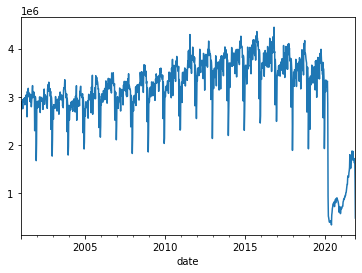

In [48]:
test['rides'].plot();

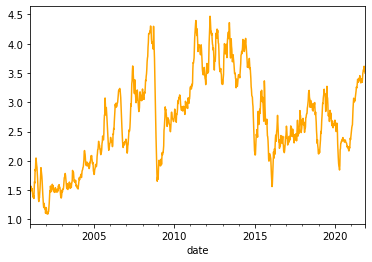

In [47]:
test['price'].plot(color='orange');

In [ ]:
# df.to_csv('../capstone-data/cta-monthly-primary.csv')